# 1. load corpus

In [1]:
import pickle
def save_obj(obj, file_name):
    pickle.dump(obj, open(file_name, 'wb'))
    
def load_obj(file_name):
    obj = pickle.load(open(file_name, 'rb'))
    return obj

In [2]:
import pandas as pd

data = pd.read_csv('../datasource/sqlResult_1558435.csv', encoding='gb18030')
data = data.fillna(' ')
data.head()

,id,author,source,content,feature,title,url
0,89617,,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [3]:
import jieba
import re
from tqdm import tqdm
from collections import Counter
import logging

jieba.setLogLevel(logging.WARNING)

def tokenize_string(string):
    string = ' '.join(re.findall('.+',string))
    sents = [list(jieba.cut(sent.strip()))+['。'] for sent in string.split('。') if sent != ' ']
    return sents

def get_corpus():
    #return [list of docs: list of sents: list of words]
    global data
    return [tokenize_string(doc) for doc in tqdm(data['content'])]

!mkdir data
save_obj(get_corpus(), 'data/processed_corpus')
print('demo of first corpus:', load_obj('data/processed_corpus')[0])

mkdir: cannot create directory ‘data’: File exists


100%|██████████| 89611/89611 [02:04<00:00, 717.57it/s]


demo of first corpus: [['此外', '，', '自', '本周', '（', '6', '月', '12', '日', '）', '起', '，', '除', '小米', '手机', '6', '等', '15', '款', '机型', '外', '，', '其余', '机型', '已', '暂停', '更新', '发布', '（', '含', '开发', '版', '/', '体验版', '内测', '，', '稳定版', '暂不受', '影响', '）', '，', '以', '确保', '工程师', '可以', '集中', '全部', '精力', '进行', '系统优化', '工作', '。'], ['有人', '猜测', '这', '也', '是', '将', '精力', '主要', '用到', 'MIUI', ' ', '9', '的', '研发', '之中', '。'], ['MIUI', ' ', '8', '去年', '5', '月', '发布', '，', '距今已有', '一年', '有余', '，', '也', '是', '时候', '更新换代', '了', '。'], ['当然', '，', '关于', 'MIUI', ' ', '9', '的', '确切', '信息', '，', '我们', '还是', '等待', '官方消息', '。'], ['。']]


# 2. TFIDF

## 2.1. term frequency

In [4]:
from collections import Counter
from tqdm import tqdm

term_freqs = [Counter([w for sent in doc for w in sent]) for doc in load_obj('data/processed_corpus')]
print('demo term freq:', term_freqs[0])

demo term freq: Counter({'，': 9, '。': 5, 'MIUI': 3, ' ': 3, '（': 2, '6': 2, '月': 2, '）': 2, '机型': 2, '发布': 2, '精力': 2, '也': 2, '是': 2, '9': 2, '的': 2, '此外': 1, '自': 1, '本周': 1, '12': 1, '日': 1, '起': 1, '除': 1, '小米': 1, '手机': 1, '等': 1, '15': 1, '款': 1, '外': 1, '其余': 1, '已': 1, '暂停': 1, '更新': 1, '含': 1, '开发': 1, '版': 1, '/': 1, '体验版': 1, '内测': 1, '稳定版': 1, '暂不受': 1, '影响': 1, '以': 1, '确保': 1, '工程师': 1, '可以': 1, '集中': 1, '全部': 1, '进行': 1, '系统优化': 1, '工作': 1, '有人': 1, '猜测': 1, '这': 1, '将': 1, '主要': 1, '用到': 1, '研发': 1, '之中': 1, '8': 1, '去年': 1, '5': 1, '距今已有': 1, '一年': 1, '有余': 1, '时候': 1, '更新换代': 1, '了': 1, '当然': 1, '关于': 1, '确切': 1, '信息': 1, '我们': 1, '还是': 1, '等待': 1, '官方消息': 1})


## 2.2. document frequency

In [5]:
vocab_freq = Counter()
doc_freq = Counter()
for c in term_freqs:
    for w in c:
        vocab_freq[w] += c[w]
        doc_freq[w] += 1

len(vocab_freq)

257941

In [6]:
def test_doc_freq(lst:list):
    for w in lst:
        print('doc freq demo:', w, doc_freq[w])
        
test_doc_freq(['华为', '小米', '三星', '苹果', '的'])

doc freq demo: 华为 179
doc freq demo: 小米 98
doc freq demo: 三星 124
doc freq demo: 苹果 381
doc freq demo: 的 70302


## 2.3. TFIDF and key words

In [7]:
import math, re
def is_target(w):
    return re.findall('[\d\w]+', w) and vocab_freq[w]>3

def tfidf_key_words(doc_vec, num_key_words=50):
    global vocab_freq, doc_freq
    result = [(w, math.log(doc_vec[w]+1)/math.log(doc_freq[w]+1)) for w in doc_vec if is_target(w)] #apply log on both tf and df
    return sorted(result, key = lambda x:x[1], reverse=True)[:num_key_words]

tfidf_key_words(term_freqs[0],10)

[('MIUI', 1.2618595071429148),
 ('内测', 0.3562071871080222),
 ('官方消息', 0.2890648263178878),
 ('机型', 0.2390824014385461),
 ('距今已有', 0.2242438242175754),
 ('有余', 0.20184908658209985),
 ('精力', 0.20170098422278315),
 ('更新换代', 0.19656163223282258),
 ('用到', 0.18790182470910757),
 ('确切', 0.16544255391905832)]

# 3. word cloud

In [8]:
import matplotlib
print(matplotlib.__path__)

['/usr/local/lib/python3.6/dist-packages/matplotlib']


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(word_importance:dict):
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)

    wc = WordCloud(background_color="white", repeat=True, font_path= matplotlib.__path__[0] +'/SimHei.ttf')
    wc.generate_from_frequencies(word_importance)

    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show()
    
plot_word_cloud(dict(tfidf_key_words(term_freqs[0])))

<Figure size 640x480 with 1 Axes>

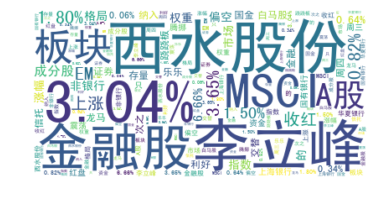

In [10]:
plot_word_cloud(dict(tfidf_key_words(term_freqs[5])))

# 4. get related key words
## 4.1. word2vec wiki + new corpus

In [11]:
from gensim.models import Word2Vec
from tqdm import tqdm

def update_word2vec():
    training_data = [sent for doc in load_obj('data/processed_corpus') for sent in doc]
    print(training_data[1])
    
    model = Word2Vec.load('../week_5/model/word2vec.model')
    print('wiki word2vec loaded...')
    model.build_vocab(training_data, update=True)
    model.train(training_data , total_examples=model.corpus_count, epochs=model.epochs)
    print('word2vec model updated!')
    !mkdir model
    save_obj(model, 'model/word2vec.model')
    
update_word2vec()

['有人', '猜测', '这', '也', '是', '将', '精力', '主要', '用到', 'MIUI', ' ', '9', '的', '研发', '之中', '。']
wiki word2vec loaded...
word2vec model updated!
mkdir: cannot create directory ‘model’: File exists


In [12]:
model = load_obj('model/word2vec.model')

## 4.2. spread key words
- clustering method
- reference: https://scikit-learn.org/stable/modules/clustering.html

In [13]:
from collections import defaultdict
def get_related_words(initial_words, model, num=20):
    max_size = 100
    seen = defaultdict(int)
    unseen = [initial_words]
    
    while unseen and len(seen) < max_size:
        node = unseen.pop(0)
        new_expanding = [w for w, s in model.most_similar(node, topn=10)]
        unseen += new_expanding
        seen[node] += 1  
        # if we need more sophsiticated, we need change the value as the function(layer, similarity)
        
    return sorted(seen.items(),key=lambda x:x[1], reverse=True)[:num]

get_related_words('说', model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/home/bluan/.local/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('指出', 43),
 ('表示', 41),
 ('说', 39),
 ('称', 32),
 ('认为', 30),
 ('声称', 30),
 ('告诉', 28),
 ('坦言', 25),
 ('看来', 23),
 ('透露', 21),
 ('还称', 17),
 ('辩称', 15),
 ('明说', 14),
 ('坚称', 13),
 ('时说', 11),
 ('强调', 10),
 ('留意到', 9),
 ('坦承', 9),
 ('普遍认为', 8),
 ('宣称', 8)]

In [14]:
model.most_similar('说', topn=20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('表示', 0.847654402256012),
 ('告诉', 0.8047897815704346),
 ('指出', 0.768217921257019),
 ('认为', 0.7312066555023193),
 ('称', 0.6989500522613525),
 ('时说', 0.6810497045516968),
 ('看来', 0.6774933338165283),
 ('明说', 0.6692867279052734),
 ('声称', 0.6683370471000671),
 ('坦言', 0.6649725437164307),
 ('透露', 0.6419785022735596),
 ('文说', 0.6334092020988464),
 ('强调', 0.6306270360946655),
 ('介绍', 0.6150978207588196),
 ('辩称', 0.6050642132759094),
 ('还称', 0.6035895347595215),
 ('坚称', 0.6000723242759705),
 ('他称', 0.5877785086631775),
 ('所说', 0.5871649980545044),
 ('并不认为', 0.5804603099822998)]

In [15]:
get_related_words('的', model,40)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('的', 14),
 ('，', 13),
 ('；', 10),
 ('和', 8),
 ('。', 8),
 ('“', 6),
 ('了', 4),
 ('”', 4),
 ('及', 4),
 ('、', 4),
 ('让', 4),
 ('不仅', 3),
 ('也', 3),
 ('而且', 3),
 (',', 3),
 ('对', 3),
 ('‘', 3),
 ('’', 3),
 ('可以', 3),
 ('能够', 3),
 ('会', 3),
 ('与', 2),
 ('以及', 2),
 ('及其', 2),
 ('等', 2),
 ('使', 2),
 ('因而', 2),
 ('支撑物', 2),
 ('柔软性', 2),
 ('「', 2),
 ('小人', 2),
 ('恶事', 2),
 ('能', 2),
 ('要', 2),
 ('不了', 2),
 ('足以', 2),
 ('难以', 2),
 ('没有', 2),
 ('不但', 2),
 ('都', 2)]

In [16]:
model.most_similar('的', topn=40)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('，', 0.7603235244750977),
 ('和', 0.6178044676780701),
 ('。', 0.6097797751426697),
 ('“', 0.5967444181442261),
 ('了', 0.5932207703590393),
 ('不仅', 0.5847872495651245),
 ('；', 0.5691806077957153),
 ('也', 0.5538132190704346),
 ('”', 0.5342092514038086),
 ('而且', 0.5322588086128235),
 ('都', 0.529591977596283),
 ('对', 0.527900218963623),
 ('这些', 0.5271453261375427),
 ('而', 0.5256970524787903),
 ('在', 0.5208359956741333),
 ('让', 0.5171656608581543),
 ('其', 0.5165321826934814),
 ('本身', 0.5157190561294556),
 ('有', 0.5136260390281677),
 ('因为', 0.5041460990905762),
 ('往往', 0.5011410713195801),
 ('分配资源', 0.4992211163043976),
 ('这种', 0.498093843460083),
 ('‘', 0.494701623916626),
 ('既', 0.49042320251464844),
 ('但', 0.4895403981208801),
 ('支撑物', 0.48830199241638184),
 ('雕琢', 0.4876566529273987),
 ('这个', 0.48026561737060547),
 ('强韧', 0.4798923134803772),
 ('把', 0.47867700457572937),
 ('同样', 0.4782991409301758),
 ('价廉', 0.4776587188243866),
 ('延展性', 0.4771752953529358),
 ('形体', 0.47648268938064575),

# 5. NER

## 5.1. Stanford CoreNLP

## 5.2. HIT LPT

## 5.3. Jieba

# 6. POS and Dependency parseing